In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# data = pd.read_excel("./mvda_adenovirus_bioprocess_data/AdV01_LucullusBioprocessData.xlsx", sheet_name=None)

data = pd.read_excel("mvda_adenovirus_bioprocess_data/AdV01_LucullusBioprocessData.xlsx", sheet_name=None)

In [37]:
print(data.keys())
for d in data.items():
    print(d[0],d[1].shape)

dict_keys(['Lucullus Data', 'Capacitance', 'Explain'])
Lucullus Data (102564, 64)
Capacitance (8577, 21)
Explain (68, 5)


# Capacitance data

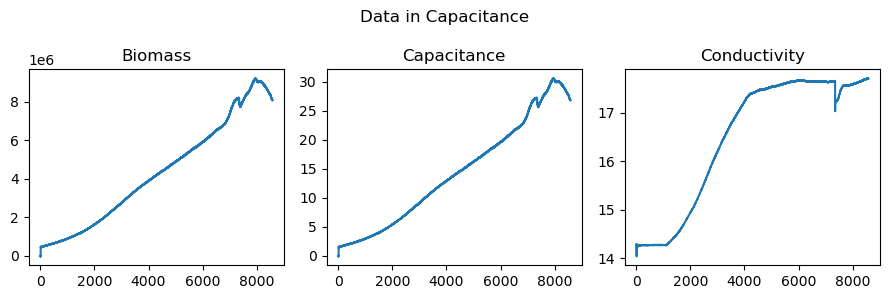

In [7]:
f, ax = plt.subplots(1,3,figsize=(9,3))

(data['Capacitance'].Biomass).plot(ax=ax[0],title='Biomass')
(data['Capacitance'].Capacitance).plot(ax=ax[1],title='Capacitance')
(data['Capacitance'].Conductivity).plot(ax=ax[2],title='Conductivity')
plt.suptitle("Data in Capacitance")
plt.tight_layout()
plt.show()

### How similar are capacitance and Biomass

In [8]:
# Load modules and data
import numpy as np

import statsmodels.api as sm

endog = data['Capacitance'].Biomass
exog = data['Capacitance'].Capacitance
# Fit and summarize OLS model
mod = sm.OLS(endog, exog)
res = mod.fit()

print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                Biomass   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.868e+13
Date:                Thu, 13 Nov 2025   Prob (F-statistic):                        0.00
Time:                        10:39:56   Log-Likelihood:                         -50569.
No. Observations:                8577   AIC:                                  1.011e+05
Df Residuals:                    8576   BIC:                                  1.011e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

* they are identical

### checking for duplicated or null data

In [52]:
data['Capacitance'].duplicated().sum()

np.int64(0)

In [54]:
data['Capacitance'].isnull().sum().sum()

np.int64(0)

In [17]:
pdf_cap = data['Capacitance']

cols = [(c,pdf_cap[c].nunique()) for c in pdf_cap.columns]
cols_to_keep_as_index = [c[0] for c in cols if c[1] == 1]
pdf_ok = pdf_cap.copy().loc[:,~pdf_cap.columns.isin(cols_to_keep_as_index)]


In [18]:
keep_data =pdf_cap.columns.to_list()
for col in cols_to_keep_as_index:
    keep_data.remove(col)
print(keep_data)
# replace special caracter that caus eproblem with spark indexing
pd.Index(keep_data).str.replace(r'[ ,;{}/\(\)\n\t=]', '_', regex=True).str.replace(r'\s','',regex=True)

['Time_Stamp', 'Biomass', 'Capacitance', 'Conductivity', 'Raw_Measure_Capacitance', '  Raw High Capacitance (pF/cm)', ' Raw Pol Low Capacitance (pF/cm)', ' Raw Pol High Capacitance (pF/cm)', 'Raw_Conductivity', ' Pol Correction Capacitance (pF/cm)']


Index(['Time_Stamp', 'Biomass', 'Capacitance', 'Conductivity',
       'Raw_Measure_Capacitance', '__Raw_High_Capacitance__pF_cm_',
       '_Raw_Pol_Low_Capacitance__pF_cm_', '_Raw_Pol_High_Capacitance__pF_cm_',
       'Raw_Conductivity', '_Pol_Correction_Capacitance__pF_cm_'],
      dtype='object')

# Lucillus data

In [4]:
new_columns = [f"{a}_{b}" if str(b).lower() != 'nan' else a for a, b in zip(data['Lucullus Data'].columns, data['Lucullus Data'].iloc[0,:])]

In [26]:
df_data = data['Lucullus Data'].iloc[5:,:]#.fillna(0)
df_data.columns = new_columns
df_data.columns = df_data.columns.str.replace(r'[ ,;{}/\(\)\n\t\s%=]', '_', regex=True)
df_data.dtypes

Time                              float64
Timestamp                          object
m_do__                             object
m_ph                               object
m_stirrer_rpm                      object
                                   ...   
M_VDENS_10E5_cls_mL                object
M_VIAB__                           object
VT_TCID_10E5_cls_mL                object
M_VDENS_MICROSCOPE_10E5_cls_mL     object
M_VIAB_MICROSCOPE__                object
Length: 64, dtype: object

In [30]:
df_data.loc[:,"Timestamp"] = pd.to_datetime(df_data.copy().Timestamp)

<BarContainer object of 64 artists>

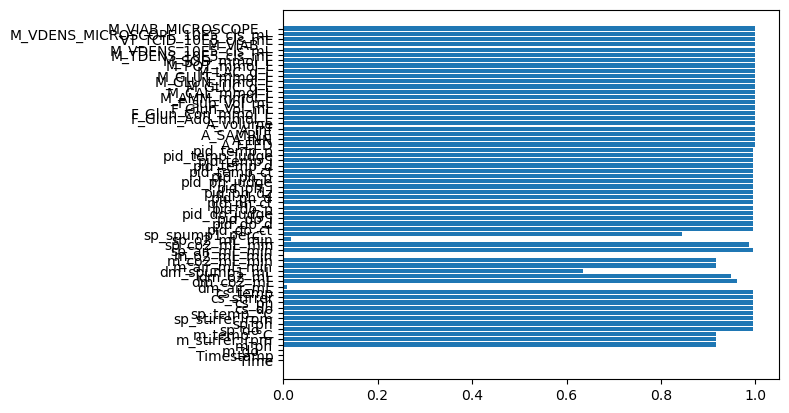

In [8]:
plt.barh(width = df_data.isnull().sum()/df_data.shape[0], y=df_data.columns)

In [47]:
df_data.columns[(df_data.isnull().sum() <= df_data.shape[0]*0.8)]

Index(['Time', 'Timestamp', 'm_do__', 'dm_air_mL', 'dm_spump1_mL',
       'm_o2_mL_min', 'sp_o2_mL_min'],
      dtype='object')

In [96]:
df_data.to_csv("copy.csv")

In [94]:
df_data.Timestamp = pd.to_datetime(df_data.Timestamp)

/var/folders/dv/gzhyqctn53s9bh23g7tbvl940000gn/T/ipykernel_13495/787957364.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_data.Timestamp = pd.to_datetime(df_data.Timestamp)
/var/folders/dv/gzhyqctn53s9bh23g7tbvl940000gn/T/ipykernel_13495/787957364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data.Timestamp = pd.to_datetime(df_data.Timestamp)


In [ ]:
describe_data = data['Capacitance'].describe(include='object')
describe_data.columns

Index(['Zero Time Stamp', 'Messages', 'Dual Frequency',
       'Polarisation Correction', 'Auto Clean'],
      dtype='object')

### Merge datasets

In [52]:
m1 = df_data.loc[:, df_data.columns.isin(df_data.columns[(df_data.isnull().sum() <= df_data.shape[0]*0.8)])]
m1.loc[:,"Timestamp"] = pd.to_datetime(m1.copy().Timestamp)
m2 = data['Capacitance'][['Time_Stamp','Capacitance','Conductivity']]
m2.loc[:,"Time_Stamp"] = pd.to_datetime(m2.copy().Time_Stamp)

merged = pd.merge(m1,m2,left_on="Timestamp",right_on="Time_Stamp",how='outer')
merged.shape

(108968, 10)

/var/folders/dv/gzhyqctn53s9bh23g7tbvl940000gn/T/ipykernel_6227/1649811211.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d = merged.drop(columns=['Time','Timestamp','Time_Stamp']).ffill().rolling(window=1000).mean().dropna()


(-2.5, 5.0)

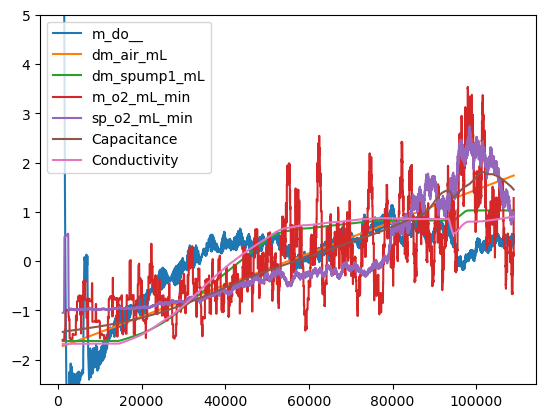

In [69]:
d = merged.drop(columns=['Time','Timestamp','Time_Stamp']).ffill().rolling(window=1000).mean().dropna()
((d - d.mean() )/ d.std()).plot()
plt.ylim(-2.5,5)

/var/folders/dv/gzhyqctn53s9bh23g7tbvl940000gn/T/ipykernel_6227/4212426950.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.heatmap(merged.drop(columns=['Time','Timestamp','Time_Stamp']).ffill().rolling(window=1000).mean().isna())


<Axes: >

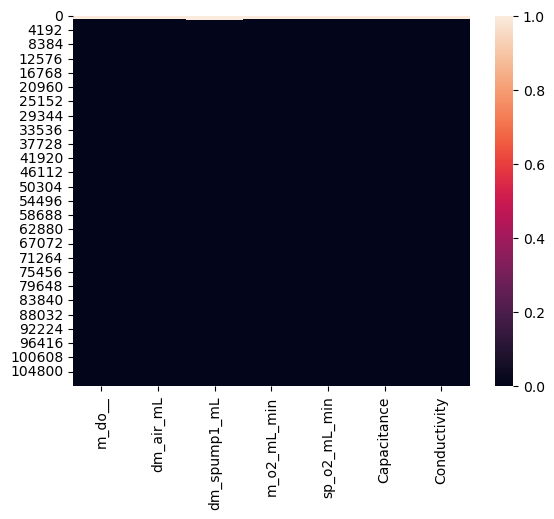

In [ ]:
import seaborn as sns
sns.heatmap(merged.drop(columns=['Time','Timestamp','Time_Stamp']).ffill().rolling(window=1000).mean())

## Ingest dat

In [51]:
with open("mvda_adenovirus_bioprocess_data/AdV01_MWF/spectra/AdV01_00000.dat","r") as f:
    data = f.read()

for l in data.split("\n"):
    print(l)

Process_Name: Br02-AD-F hycell
Date: 14/05/2022
Time: 10:35:53
Process_Time(days): 0.0002116
Light_Status(1=on): 1 1 
Light_Name: uv 365 uv 400
Light_Control_Type(0=Phidget,1=COMport,2=LPT1,3=LabJack,4=LabJack(reversed),5=Phidget(reversed)): 0 0
Voltage(V): 5.5 5.5
Integration_Time(ms): 300.0 300.0
Scans_To_Average: 10 10
Boxcar_Width(px): 20
Acquisition_Interval(min): 5.0
--------------------------------------------------
180.96483 1.6383749999995416 13.926187499999742
181.18397226108897 1.6383749999995416 13.926187499999742
181.40310466223272 1.6383749999995416 13.926187499999742
181.62222720024678 5.324718750000102 -11.468624999999975
181.84133987194656 -34.201078125000095 -3.4815468749998217
182.06044267414745 -27.033187500000622 36.45384375000003
182.27953560366498 14.13098437499957 -16.79334374999962
182.49861865731452 -72.90768750000007 -49.560843749999094
182.71769183191154 -18.226921875000244 -24.57562499999949
182.93675512427143 -0.8191875000006803 11.46862499999952
183.15580

<Axes: xlabel='Col1'>

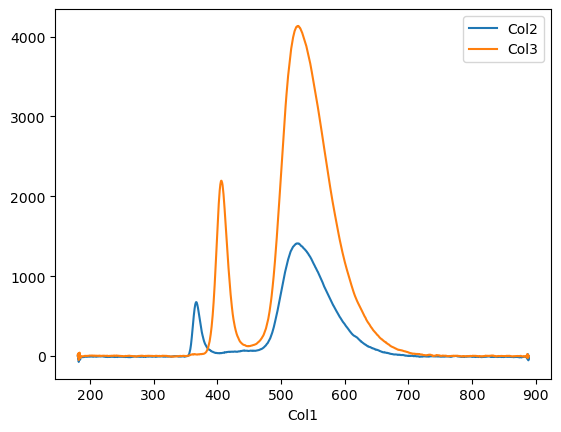

In [55]:
meta_text, data_text = data.split('--------------------------------------------------')

from io import StringIO
df_data = pd.read_csv(StringIO(data_text.strip()), sep=r'\s+', header=None)

# Assign generic column names
df_data.columns = ['Col1', 'Col2', 'Col3']
df_data.plot(x='Col1',y=['Col2','Col3'])

# compare datasets